In [1]:
import pandas as pd
import numpy as np
import seaborn  
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:/Users/malav/Downloads/train_v9rqX0R.csv")
test = pd.read_csv("C:/Users/malav/Downloads/test_AbJTz2l.csv")
soln = pd.read_csv("C:/Users/malav/Downloads/sample_submission_8RXa3c6.csv")

In [3]:
train = train.head(5681)
test = test.head(5681)

In [4]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDN60,15.100,Low Fat,0.095546,Baking Goods,157.3604,OUT018,2009,Medium,Tier 3,Supermarket Type2,4436.8912
5677,FDD29,12.150,Low Fat,0.018395,Frozen Foods,251.6698,OUT013,1987,High,Tier 3,Supermarket Type1,6088.0752
5678,FDG58,10.695,Regular,0.087272,Snack Foods,153.7972,OUT017,2007,NaN,Tier 2,Supermarket Type1,2025.3636
5679,FDV15,NaN,Low Fat,0.145465,Meat,105.7648,OUT027,1985,Medium,Tier 3,Supermarket Type3,2596.6200


In [5]:
train.shape, test.shape

((5681, 12), (5681, 11))

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
5676           FDN60       15.100          Low Fat         0.095546   
5677           FDD29       12.150          Low Fat         0.018395   
5678           FDG58       10.695          Regular         0.087272   
5679           FDV15          NaN          Low Fat         0.145465   
5680           FDV04        7.825          Regular         0.149890   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049 

In [8]:
train.nunique()

Item_Identifier              1549
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5282
Item_Type                      16
Item_MRP                     4423
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            2870
dtype: int64

In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                   944
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1632
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
train['Item_Weight'].nunique()

410

In [12]:
#EDA

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

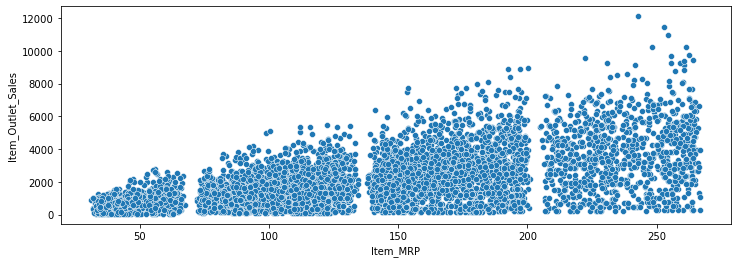

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.scatterplot(x ="Item_MRP", y ="Item_Outlet_Sales",data = train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

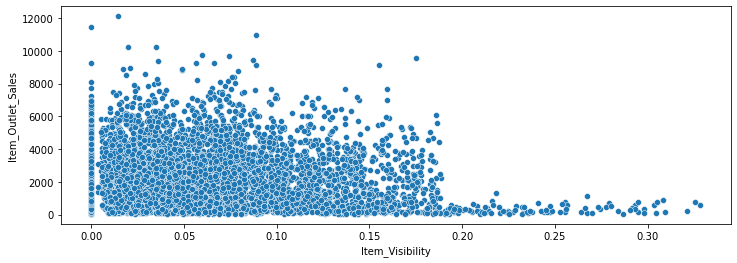

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.scatterplot(x ="Item_Visibility", y ="Item_Outlet_Sales",data = train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

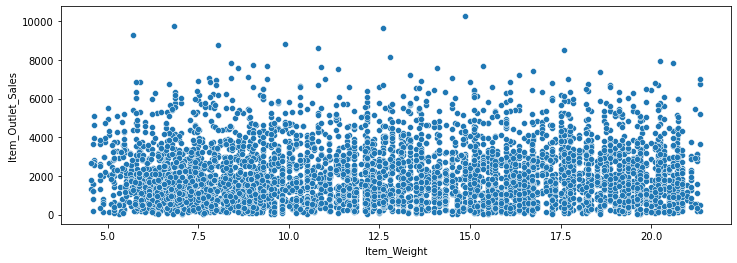

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.scatterplot(x ="Item_Weight", y ="Item_Outlet_Sales",data = train)

In [16]:
#MISSING value

In [17]:
#train['Item_Weight'] = pd.to_numeric(train['Item_Weight'], errors='coerce')
#test['Item_Weight'] = pd.to_numeric(test['Item_Weight'], errors='coerce')

In [18]:
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())

In [19]:
train['Outlet_Size'].value_counts()

Medium    1832
Small     1587
High       630
Name: Outlet_Size, dtype: int64

In [20]:
train['Outlet_Size'].mode()

0    Medium
dtype: object

In [21]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [22]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [24]:
#features selecting 

In [25]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [26]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
5676,15.100000,Low Fat,0.095546,Baking Goods,157.3604,2009,Medium,Tier 3,Supermarket Type2,4436.8912
5677,12.150000,Low Fat,0.018395,Frozen Foods,251.6698,1987,High,Tier 3,Supermarket Type1,6088.0752
5678,10.695000,Regular,0.087272,Snack Foods,153.7972,2007,Medium,Tier 2,Supermarket Type1,2025.3636
5679,12.945952,Low Fat,0.145465,Meat,105.7648,1985,Medium,Tier 3,Supermarket Type3,2596.6200


In [27]:
#preprocessing

In [28]:
#label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
train['Item_Fat_Content']= le.fit_transform(train['Item_Fat_Content'])
train['Item_Type']= le.fit_transform(train['Item_Type'])
train['Outlet_Size']= le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']= le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']= le.fit_transform(train['Outlet_Type'])

In [31]:
#SPLIT

In [32]:
X=train.drop('Item_Outlet_Sales',axis=1)
Y=train['Item_Outlet_Sales']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [34]:
#STANDARDISE

In [35]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [36]:
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [37]:
#Logistic regression

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [40]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [41]:
y_pred_lr=lr.predict(X_test_std)

In [42]:
print(r2_score(Y_test,y_pred_lr))
print(mean_absolute_error(Y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,y_pred_lr)))

0.5030315810768508
900.959274392316
1189.2203695834771


In [43]:
#Random forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [45]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [46]:
y_pred_rf= rf.predict(X_test_std)

In [47]:
print(r2_score(Y_test,y_pred_rf))
print(mean_absolute_error(Y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,y_pred_rf)))

0.5521626957043847
805.7733211266492
1128.9067693463237


In [48]:
#hyper parameter tuning

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [50]:
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

In [51]:
# define grid search
grid = dict(n_estimators=n_estimators)

In [52]:
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [53]:
# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Best: 0.534 using {'n_estimators': 1000}
0.502 (0.007) with: {'n_estimators': 10}
0.532 (0.009) with: {'n_estimators': 100}
0.534 (0.011) with: {'n_estimators': 1000}


In [54]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [55]:
grid_search_forest.best_score_

0.5336545093209901

In [56]:
y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [57]:
r2_score(Y_test,y_pred_rf_grid)

0.5517788197556288

In [58]:
#SAVE

In [59]:
# use the best model to predict on test data
y_pred_rf_grid = grid_search_forest.predict(X_test_std)

# create a new dataframe with the predicted values
df_results = pd.DataFrame({'Item_Outlet_Sales': y_pred_rf_grid})

# save the dataframe to a CSV file
df_results.to_csv('predicted_results.csv', index=False)

In [60]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\malav\AI_ML_Course


In [61]:
import os

# create results directory if it does not exist
if not os.path.exists("C:/Users/malav/AI_ML_Course"):
    os.mkdir("C:/Users/malav/AI_ML_Course")

# save dataframe as csv file in results directory
df_results.to_csv("C:/Users/malav/AI_ML_Course/result_file.csv", index=False)
